In [956]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings

In [957]:
from datasist.structdata import detect_outliers
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , RobustScaler , MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import joblib

In [958]:
warnings.filterwarnings('ignore')

In [959]:
sns.set_theme(context = 'notebook' , palette = 'Set1' , style = 'darkgrid' , rc = {'figure.figsize' : (8 , 4)})

In [960]:
%matplotlib inline

In [961]:
df = pd.read_csv('Breast_Cancer.csv')
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [962]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [963]:
df.isnull().mean()*100

Age                       0.0
Race                      0.0
Marital Status            0.0
T Stage                   0.0
N Stage                   0.0
6th Stage                 0.0
differentiate             0.0
Grade                     0.0
A Stage                   0.0
Tumor Size                0.0
Estrogen Status           0.0
Progesterone Status       0.0
Regional Node Examined    0.0
Reginol Node Positive     0.0
Survival Months           0.0
Status                    0.0
dtype: float64

In [964]:
df.duplicated().sum()

1

In [965]:
df.drop_duplicates(inplace = True , ignore_index = True)

In [966]:
df['Age'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Age,4023.0,53.969923,8.963118,30.0,47.0,54.0,61.0,69.0


<AxesSubplot:xlabel='Age', ylabel='Density'>

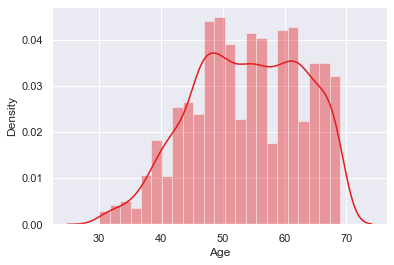

In [967]:
sns.distplot(df['Age'])

<AxesSubplot:xlabel='Age'>

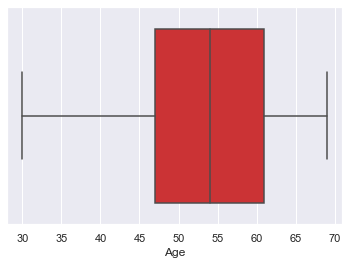

In [968]:
sns.boxplot(df['Age'])

In [969]:
df['Race'].unique()

array(['White', 'Black', 'Other'], dtype=object)

<AxesSubplot:xlabel='Race', ylabel='count'>

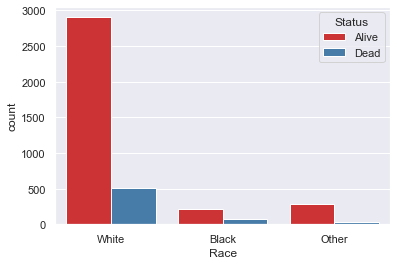

In [970]:
sns.countplot(df['Race'] , hue = df['Status'])

In [971]:
df['Marital Status'].unique()

array(['Married', 'Divorced', 'Single ', 'Widowed', 'Separated'],
      dtype=object)

<AxesSubplot:xlabel='Marital Status', ylabel='count'>

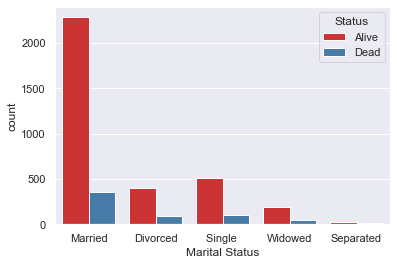

In [972]:
sns.countplot(df['Marital Status'] , hue = df['Status'])

In [973]:
df['Marital Status'] = df['Marital Status'].apply(lambda x : 'Divorced' if x == 'Separated' else x )

In [974]:
df['T Stage '].unique()

array(['T1', 'T2', 'T3', 'T4'], dtype=object)

<AxesSubplot:xlabel='T Stage ', ylabel='count'>

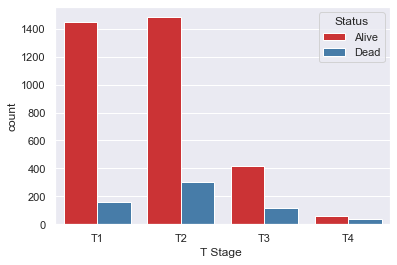

In [975]:
sns.countplot(df['T Stage '] , hue = df['Status'])

In [976]:
df['T Stage '] = df['T Stage '].apply(lambda x : int(x[1]))

In [977]:
df['N Stage'].unique()

array(['N1', 'N2', 'N3'], dtype=object)

<AxesSubplot:xlabel='N Stage', ylabel='count'>

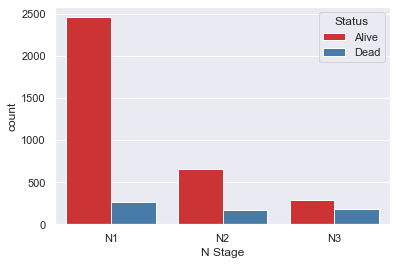

In [978]:
sns.countplot(df['N Stage'] , hue = df['Status'])

In [979]:
df['N Stage'] = df['N Stage'].apply(lambda x : int(x[1]))

In [980]:
df['6th Stage'].unique()

array(['IIA', 'IIIA', 'IIIC', 'IIB', 'IIIB'], dtype=object)

<AxesSubplot:xlabel='6th Stage', ylabel='count'>

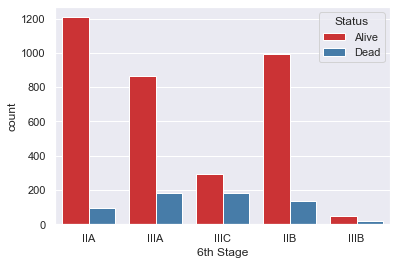

In [981]:
sns.countplot(df['6th Stage'] , hue = df['Status'])

In [982]:
mapper = {'IIA' : 1 , 'IIIA' : 2 , 'IIB' : 3 , 'IIIB' : 4 , 'IIIC' : 5}

In [983]:
df['6th Stage'] = df['6th Stage'].map(mapper)

In [984]:
df['differentiate'].unique()

array(['Poorly differentiated', 'Moderately differentiated',
       'Well differentiated', 'Undifferentiated'], dtype=object)

In [985]:
df['differentiate'] = df['differentiate'].apply(lambda x : x.split(' ')[0])

In [986]:
df['differentiate'].unique()

array(['Poorly', 'Moderately', 'Well', 'Undifferentiated'], dtype=object)

In [987]:
mapper = {'Undifferentiated' : 1 , 'Poorly' : 2 , 'Moderately' : 4 , 'Well' : 3}

In [988]:
df['differentiate'] = df['differentiate'].map(mapper)

In [989]:
df['Grade'].unique()

array(['3', '2', '1', ' anaplastic; Grade IV'], dtype=object)

In [990]:
df['Grade'].value_counts()

2                        2350
3                        1111
1                         543
 anaplastic; Grade IV      19
Name: Grade, dtype: int64

In [991]:
df['Grade'] = df['Grade'].apply(lambda x : 4 if x == ' anaplastic; Grade IV' else int(x))

In [992]:
df['Grade'].unique()

array([3, 2, 1, 4], dtype=int64)

<AxesSubplot:xlabel='Grade', ylabel='count'>

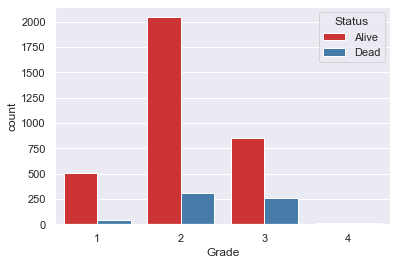

In [993]:
sns.countplot(df['Grade'] , hue = df['Status'])

In [994]:
df['A Stage'].unique()

array(['Regional', 'Distant'], dtype=object)

<AxesSubplot:xlabel='A Stage', ylabel='count'>

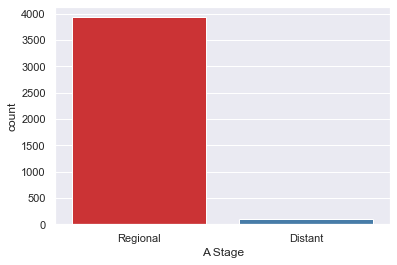

In [995]:
sns.countplot(df['A Stage'])

In [996]:
df['Tumor Size'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Tumor Size,4023.0,30.477007,21.121253,1.0,16.0,25.0,38.0,140.0


<AxesSubplot:xlabel='Tumor Size'>

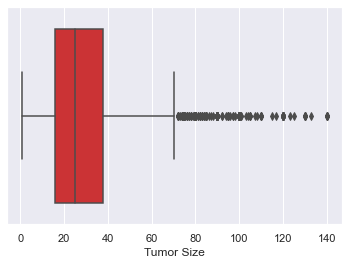

In [997]:
sns.boxplot(df['Tumor Size'])

<AxesSubplot:xlabel='Tumor Size', ylabel='Density'>

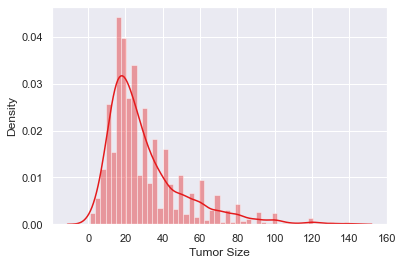

In [998]:
sns.distplot(df['Tumor Size'])

In [999]:
len(detect_outliers(df,0,['Tumor Size']))

222

In [1000]:
df.drop(df[df['Tumor Size'] > 100].index , inplace = True , axis = 0 )

In [1001]:
df.reset_index(inplace = True , drop = True)

In [1002]:
df['Estrogen Status'].unique()

array(['Positive', 'Negative'], dtype=object)

<AxesSubplot:xlabel='Estrogen Status', ylabel='count'>

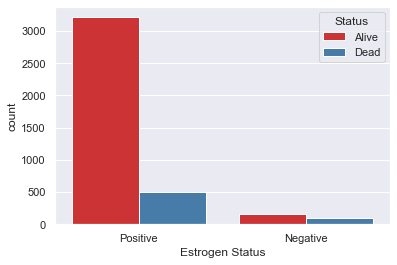

In [1003]:
sns.countplot(df['Estrogen Status'] , hue = df['Status'])

In [1004]:
df['Estrogen Status'] = df['Estrogen Status'].apply(lambda x : 1 if x == 'Positive' else 0)

In [1005]:
df['Progesterone Status'].unique()

array(['Positive', 'Negative'], dtype=object)

In [1006]:
df['Progesterone Status'] = df['Progesterone Status'].apply(lambda x : 1 if x == 'Positive' else 0)

<AxesSubplot:xlabel='Progesterone Status', ylabel='count'>

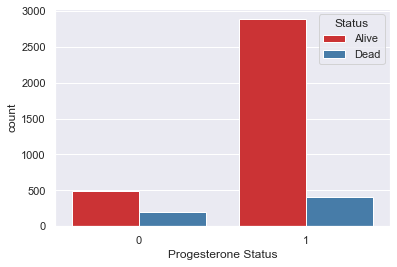

In [1007]:
sns.countplot(df['Progesterone Status'] , hue = df['Status'])

In [1008]:
df['Regional Node Examined'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Regional Node Examined,3980.0,14.338191,8.089764,1.0,9.0,14.0,19.0,61.0


<AxesSubplot:xlabel='Regional Node Examined'>

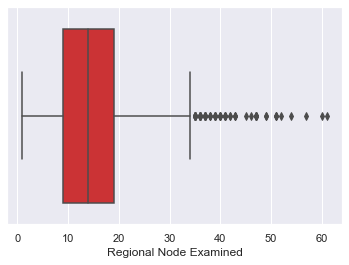

In [1009]:
sns.boxplot(df['Regional Node Examined'])

In [1010]:
df['Reginol Node Positive'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Reginol Node Positive,3980.0,4.122111,5.096176,1.0,1.0,2.0,5.0,46.0


<AxesSubplot:xlabel='Reginol Node Positive'>

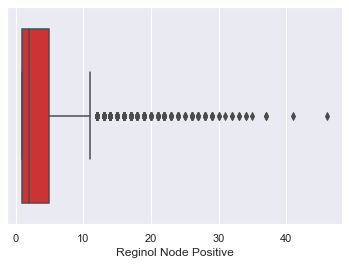

In [1011]:
sns.boxplot(df['Reginol Node Positive'])

In [1012]:
df[df['Reginol Node Positive'] > 38]

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
620,48,White,Married,1,3,5,2,3,Regional,20,0,0,54,46,50,Dead
2152,59,White,Single,1,3,5,2,3,Regional,14,1,1,41,41,81,Alive


In [1013]:
df['Survival Months'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Survival Months,3980.0,71.379397,22.920479,1.0,56.0,73.0,90.0,107.0


<AxesSubplot:xlabel='Survival Months'>

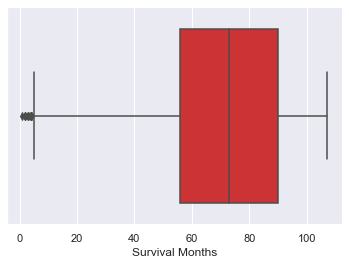

In [1014]:
sns.boxplot(df['Survival Months'])

<AxesSubplot:xlabel='Survival Months', ylabel='Density'>

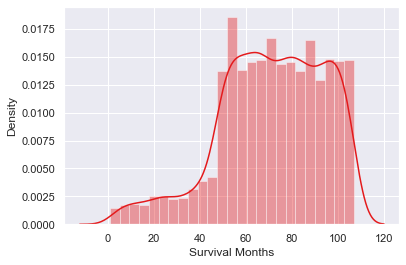

In [1015]:
sns.distplot(df['Survival Months'])

In [1016]:
df['Status'].unique()

array(['Alive', 'Dead'], dtype=object)

<AxesSubplot:xlabel='Status', ylabel='count'>

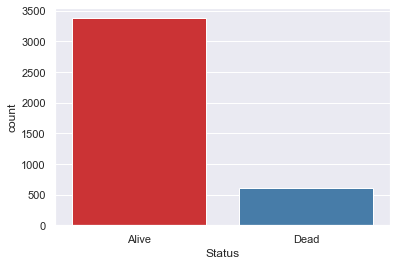

In [1017]:
sns.countplot(df['Status'])

<AxesSubplot:xlabel='Age', ylabel='Tumor Size'>

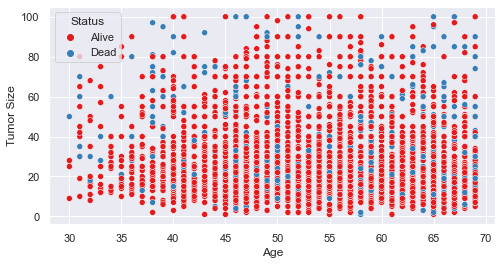

In [1018]:
plt.figure(figsize =(8 ,4 ))
sns.scatterplot( x = df['Age'] , y = df['Tumor Size'] , hue = df['Status'])

<AxesSubplot:xlabel='Age', ylabel='Regional Node Examined'>

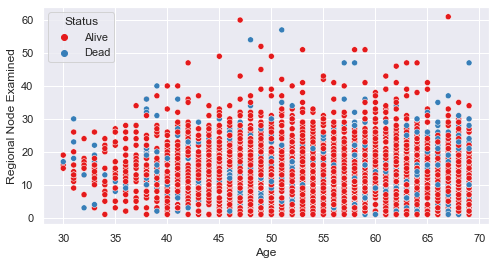

In [1019]:
plt.figure(figsize =(8 ,4 ))
sns.scatterplot( x = df['Age'] , y = df['Regional Node Examined'] , hue = df['Status'])

<AxesSubplot:xlabel='Age', ylabel='Reginol Node Positive'>

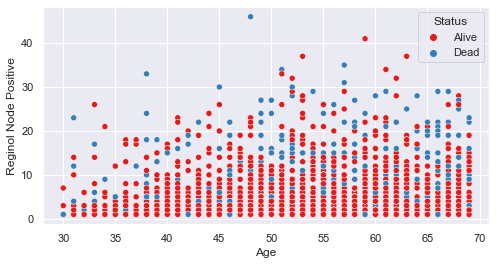

In [1020]:
plt.figure(figsize =(8 ,4 ))
sns.scatterplot( x = df['Age'] , y = df['Reginol Node Positive'] , hue = df['Status'])

<AxesSubplot:xlabel='Tumor Size', ylabel='Regional Node Examined'>

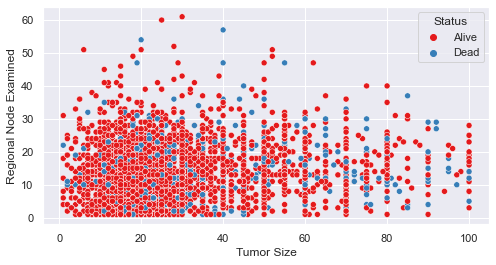

In [1021]:
plt.figure(figsize =(8 ,4 ))
sns.scatterplot( x = df['Tumor Size'] , y = df['Regional Node Examined'] , hue = df['Status'])

<AxesSubplot:xlabel='Tumor Size', ylabel='Reginol Node Positive'>

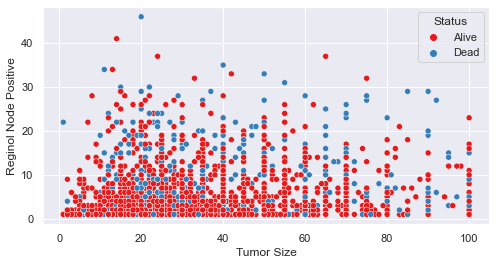

In [1022]:
plt.figure(figsize =(8 ,4 ))
sns.scatterplot( x = df['Tumor Size'] , y = df['Reginol Node Positive'] , hue = df['Status'])

<AxesSubplot:xlabel='Age', ylabel='Survival Months'>

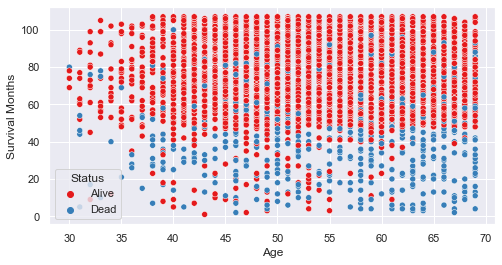

In [1023]:
plt.figure(figsize =(8 ,4 ))
sns.scatterplot( x = df['Age'] , y = df['Survival Months'] , hue = df['Status'])

<AxesSubplot:xlabel='Tumor Size', ylabel='Survival Months'>

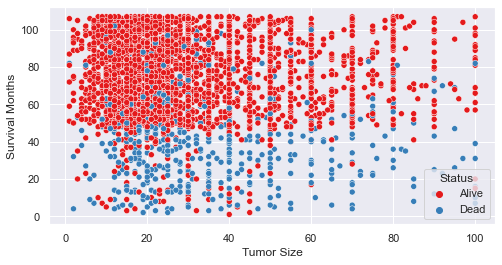

In [1024]:
plt.figure(figsize =(8 ,4 ))
sns.scatterplot( x = df['Tumor Size'] , y = df['Survival Months'] , hue = df['Status'])

In [1025]:
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,1,1,1,2,3,Regional,4,1,1,24,1,60,Alive
1,50,White,Married,2,2,2,4,2,Regional,35,1,1,14,5,62,Alive
2,58,White,Divorced,3,3,5,4,2,Regional,63,1,1,14,7,75,Alive
3,58,White,Married,1,1,1,2,3,Regional,18,1,1,2,1,84,Alive
4,47,White,Married,2,1,3,2,3,Regional,41,1,1,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3975,62,Other,Married,1,1,1,4,2,Regional,9,1,1,1,1,49,Alive
3976,56,White,Divorced,2,2,2,4,2,Regional,46,1,1,14,8,69,Alive
3977,68,White,Married,2,1,3,4,2,Regional,22,1,0,11,3,69,Alive
3978,58,Black,Divorced,2,1,3,4,2,Regional,44,1,1,11,1,72,Alive


In [1026]:
col = ['Age' , 'Tumor Size' , 'Regional Node Examined' , 'Reginol Node Positive' ,'Survival Months' ]

<AxesSubplot:>

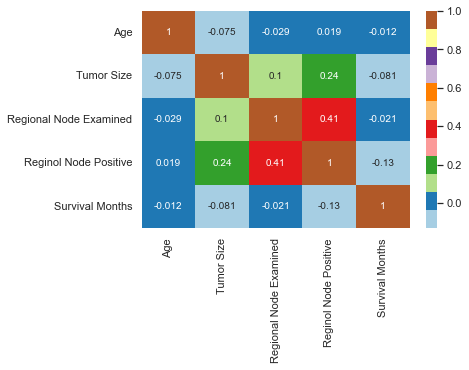

In [1027]:
sns.heatmap(df[col].corr() , annot = True , cmap = 'Paired')

In [1028]:
df.drop(['Regional Node Examined'] , axis = 1 , inplace = True)

In [1029]:
df['Status'].value_counts(normalize = True)

Alive    0.848241
Dead     0.151759
Name: Status, dtype: float64

In [1030]:
col_to_encd = ['Race' ,'Marital Status', 'A Stage']

In [1031]:
encodr = OneHotEncoder(sparse = False , drop = 'first')

In [1032]:
df = pd.concat([df , pd.DataFrame(encodr.fit_transform(df[col_to_encd]) , columns = encodr.get_feature_names_out())] , axis =  1)

In [1033]:
df.drop(col_to_encd , axis = 1 , inplace = True)

In [1034]:
le = LabelEncoder()

In [1035]:
df['Status'] = le.fit_transform(df['Status'])

In [1036]:
df['Status'].value_counts()

0    3376
1     604
Name: Status, dtype: int64

In [1037]:
x = df.drop(['Status'] , axis = 1 )
y = df['Status']

In [1038]:
sm = SMOTE(random_state = 7 , sampling_strategy = {1:1700})

In [1039]:
x , y = sm.fit_resample(x , y)

In [1040]:
rm = RandomUnderSampler(random_state = 7 , sampling_strategy = {0 : 2500})

In [1041]:
x , y = rm.fit_resample(x , y)

In [1042]:
x_train , x_test , y_train , y_test = train_test_split(x , y , random_state = 7 ,
                                                       stratify = y , test_size = 0.25 , 
                                                      shuffle = True)

In [1043]:
sclr = StandardScaler()

In [1044]:
x_train[x_train.columns] = sclr.fit_transform(x_train[x_train.columns])

In [1045]:
x_test[x_test.columns] = sclr.transform(x_test[x_test.columns])

##### Logistic Regression 

In [1046]:
poly = PolynomialFeatures(degree = 4)

In [1047]:
x_train = poly.fit_transform(x_train)

In [1048]:
model = LogisticRegression( penalty = 'l2', C = 0.001 )

In [1049]:
model.fit(x_train , y_train)

LogisticRegression(C=0.001)

In [1050]:
y_train_prd = model.predict(x_train)

In [1051]:
y_test_prd = model.predict(poly.transform(x_test))

In [1052]:
accuracy_score(y_true = y_train , y_pred = y_train_prd)

0.9114285714285715

In [1053]:
accuracy_score(y_true = y_test , y_pred = y_test_prd)

0.8742857142857143

In [1054]:
cm = confusion_matrix(y_true = y_train , y_pred = y_train_prd)

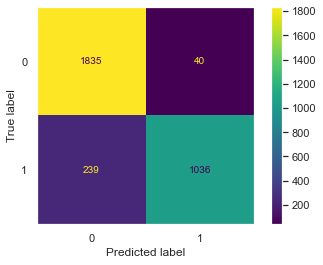

In [1055]:
sns.set_style('dark')
ConfusionMatrixDisplay(cm , display_labels = model.classes_).plot()

In [1056]:
cm = confusion_matrix(y_true = y_test , y_pred = y_test_prd)

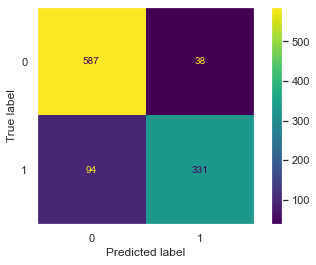

In [1057]:
sns.set_style('dark')
ConfusionMatrixDisplay(cm , display_labels = model.classes_).plot()

In [1058]:
joblib.dump(model , 'model.pkl')

['model.pkl']

### KNN Classifier

In [1059]:
x = df.drop(['Status'] , axis = 1 )
y = df['Status']

In [1060]:
x_train , x_test , y_train , y_test = train_test_split(x , y , random_state = 7 ,
                                                       stratify = y , test_size = 0.25 , 
                                                      shuffle = True)

In [1061]:
sclr = MinMaxScaler()

In [1062]:
x_train[x_train.columns] = sclr.fit_transform(x_train[x_train.columns])

In [1063]:
x_test[x_test.columns] = sclr.transform(x_test[x_test.columns])

In [1064]:
train_acc , test_acc = [] , []

In [1065]:
for k in range( 3 , 26 , 2):
    Knn_model = KNeighborsClassifier( n_neighbors = k)
    Knn_model.fit(x_train , y_train)
    train_prd = Knn_model.predict(x_train)
    test_prd = Knn_model.predict(x_test)
    train_acc.append(accuracy_score(y_true = y_train , y_pred = train_prd))
    test_acc.append(accuracy_score(y_true = y_test , y_pred = test_prd))

<AxesSubplot:>

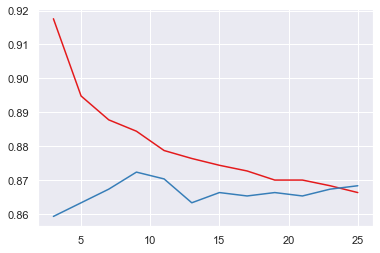

In [1066]:
sns.set_style('darkgrid')
sns.lineplot(range( 3 , 26 , 2) , train_acc)
sns.lineplot(range( 3 , 26 , 2) , test_acc)

In [1067]:
knn = KNeighborsClassifier(n_neighbors = 9)

In [1068]:
knn.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=9)

In [1069]:
train_prd = knn.predict(x_train)
test_prd = knn.predict(x_test)

In [1070]:
accuracy_score(y_true = y_train , y_pred = train_prd)

0.8844221105527639

In [1071]:
accuracy_score(y_true = y_test , y_pred = test_prd)

0.8723618090452261

In [1072]:
joblib.dump(knn , 'knn_model.h5')

['knn_model.h5']